In [1]:
import toolbox_path
import os
from utils import *

from planning_toolbox.imagine import graphs, imagine_state
from planning_toolbox.parser import parse_file

from IPython.display import display

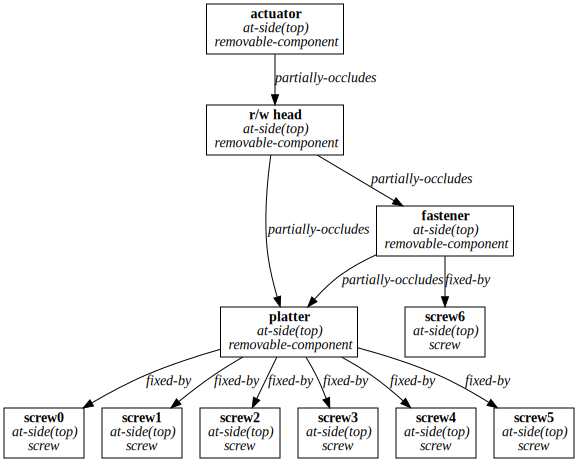

In [3]:
g = graphs.Graph(("platter", "removable-component"),
                 ("platter", "at-side(top)"),
                 ("r/w head", "removable-component"),
                 ("r/w head", "at-side(top)"),
                 ("fastener", "removable-component"),
                 ("fastener", "at-side(top)"),
                 ("actuator", "removable-component"),
                 ("actuator", "at-side(top)"),
                 ("screw0", "at-side(top)"),
                 ("screw0", "screw"),
                 ("screw1", "at-side(top)"),
                 ("screw1", "screw"),
                 ("screw2", "at-side(top)"),
                 ("screw2", "screw"),
                 ("screw3", "at-side(top)"),
                 ("screw3", "screw"),
                 ("screw4", "at-side(top)"),
                 ("screw4", "screw"),
                 ("screw5", "at-side(top)"),
                 ("screw5", "screw"),
                 ("screw6", "at-side(top)"),
                 ("screw6", "screw"),
                 ("r/w head", "platter", "partially-occludes"),
                 ("r/w head", "fastener", "partially-occludes"),
                 ("fastener", "platter", "partially-occludes"),
                 ("platter", "screw0", "fixed-by"),
                 ("platter", "screw1", "fixed-by"),
                 ("platter", "screw2", "fixed-by"),
                 ("platter", "screw3", "fixed-by"),
                 ("platter", "screw4", "fixed-by"),
                 ("platter", "screw5", "fixed-by"),
                 ("fastener", "screw6", "fixed-by"),
                 ("actuator", "r/w head", "partially-occludes"),
                 )

display(g)
g.to_pdf("paper-graph-example")

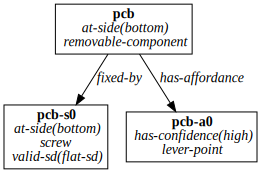

In [4]:
g = graphs.Graph(("pcb", "at-side(bottom)"),
                 ("pcb", "removable-component"),
                 ("pcb-s0", "at-side(bottom)"),
                 ("pcb-s0", "screw"),
                 ("pcb-s0", "valid-sd(flat-sd)"),
                 ("pcb-a0", "has-confidence(high)"),
                 ("pcb-a0", "lever-point"),
                 ("pcb", "pcb-s0", "fixed-by"),
                 ("pcb", "pcb-a0", "has-affordance"),
                 )

display(g)
g.to_pdf("complex-device-pcb")

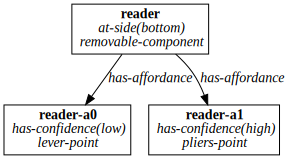

In [5]:
g = graphs.Graph(("reader", "at-side(bottom)"),
                 ("reader", "removable-component"),
                 ("reader-a0", "has-confidence(low)"),
                 ("reader-a0", "lever-point"),
                 ("reader-a1", "has-confidence(high)"),
                 ("reader-a1", "pliers-point"),
                 ("reader", "reader-a0", "has-affordance"),
                 ("reader", "reader-a1", "has-affordance"),
                 )

display(g)
g.to_pdf("complex-device-reader")

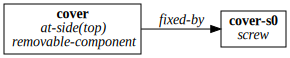

In [3]:
h = graphs.Graph(*g.features(ommit_hidden=True))
display(h)

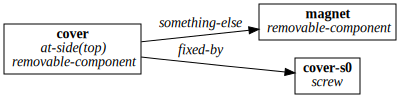

In [4]:
i = g.subgraph("cover", max_depth=1, exclude_links=["hides-component"])
display(i)

In [36]:
folder = "../benchmarks/imagine_occlusions/"
# folder = "../benchmarks/imagine_simple/"
domain = parse_file(folder+"domain.pddl", "domain")
problems = sorted(folder+f for f in os.listdir(folder) if PROBLEM_FILE_RE.match(f))
print(domain)

(define (domain imagine)

(:requirements :adl :rewards :probabilistic-effects)

(:types component side mode tool affordance affordance-confidence - object
removable-component - component
lever-point suction-point pliers-point - affordance
screwdriver - tool
screw - removable-component)

(:constants top bottom front back left right - side low medium high - affordance-confidence scara power no-mode - mode flat-sd star-sd - screwdriver hammer suction-tool pliers cutter no-tool - tool)

(:predicates
  (has-affordance ?c - removable-component ?a - affordance)
  (has-confidence ?a - affordance ?c - affordance-confidence)
  (broken-component ?c - removable-component)
  (broken-tool ?t - tool)
  (connected ?c1 ?c2 - component)
  (clear ?c - removable-component)
  (current-mode ?m - mode)
  (current-side ?s - side)
  (current-tool ?t - tool)
  (held)
  (hides-component ?c1 ?c2 - component)
  (hides-affordance ?c1 - component ?a - affordance)
  (fixed-by ?c - removable-component ?s - screw)
  (l

In [49]:
problem = parse_file(problems[4], "problem", domain)
print(problem)

(define (problem p03)
(:domain imagine)
(:objects reader platter pcb - removable-component reader-s0 pcb-s0 - screw reader-a0 pcb-a0 - lever-point reader-a1 - pliers-point platter-a0 platter-a1 - suction-point)
(:init
  (has-affordance pcb pcb-a0)
  (has-affordance reader reader-a0)
  (has-affordance reader reader-a1)
  (has-affordance platter platter-a0)
  (has-affordance platter platter-a1)
  (has-confidence reader-a0 low)
  (has-confidence reader-a1 high)
  (has-confidence platter-a0 low)
  (has-confidence platter-a1 high)
  (has-confidence pcb-a0 high)
  (current-mode no-mode)
  (current-tool no-tool)
  (fixed-by reader reader-s0)
  (fixed-by pcb pcb-s0)
  (loose platter)
  (hides-component pcb reader-s0)
  (partially-occludes reader platter)
  (hides-affordance reader platter-a1)
  (at-side reader top)
  (at-side platter top)
  (at-side reader-s0 bottom)
  (at-side pcb bottom)
  (at-side pcb-s0 bottom)
  (current-side top)
  (valid-sd reader-s0 star-sd)
  (valid-sd pcb-s0 flat-sd)

In [50]:
state = imagine_state.ImagineState(problem.init.predicates, objects=problem.objects)

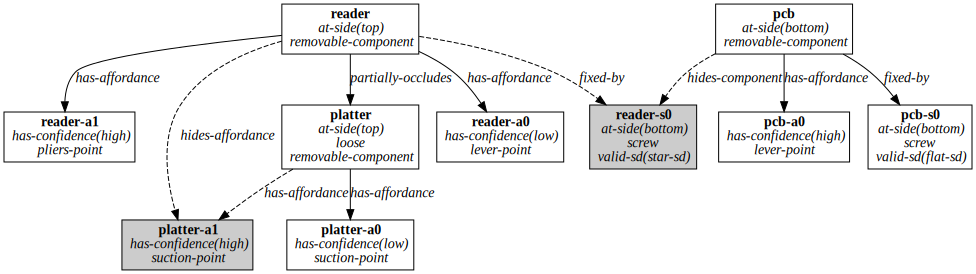

In [51]:
display(state.graph)
state.graph.to_pdf("imagine-occlusions-p5")

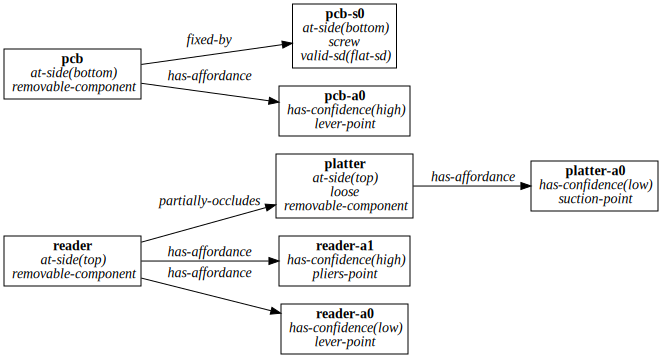

In [9]:
no_hidden = graphs.Graph(*state.graph.features(ommit_hidden=True))
display(no_hidden)
no_hidden.to_pdf("simple-device-no-hidden")

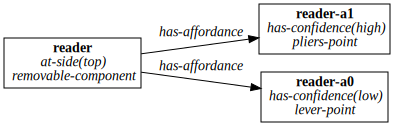

In [10]:
no_occlusions = no_hidden.subgraph("reader", exclude_links=["partially-occludes"], max_depth=1000)
display(no_occlusions)
no_occlusions.to_pdf("simple-device-no-occlusions")

In [11]:
print(state.graph.occluded)

{'platter'}
